In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import pyreadstat
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import gaussian_kde
from pandas.plotting import scatter_matrix
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from factor_analyzer import FactorAnalyzer

In [2]:
# import data
pewdata, meta = pyreadstat.read_sav("Mar19public.sav", apply_value_formats= True, disable_datetime_conversion = True)

In [3]:
pewdata.head()

,respid,sample,int_date,fcall,attempt,refusal,lang,cregion,state,usr,...,hh1,hh3,adults,ql1,ql1a,qc1,ll,cp,money2,weight
0,2.0,Landline,190320.0,190320.0,1.0,No,English,Northeast,NY,U,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,1.150112
1,3.0,Landline,190320.0,190320.0,1.0,No,English,Northeast,PA,U,...,1.0,NaN,1,"No, do not",NaN,NaN,Landline,No cellphone,NaN,2.092222
2,4.0,Landline,190320.0,190320.0,1.0,No,English,South,FL,S,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,0.963393
3,5.0,Landline,190320.0,190320.0,1.0,No,English,South,NC,R,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,0.489359
4,6.0,Landline,190320.0,190320.0,1.0,No,English,Midwest,MI,R,...,4.0,3.0,3 or more,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,1.930009


## Political opinion variables

In [4]:
# check on column indices for political opinion variables
print(pewdata.columns.get_loc('q1')) # this is q1
print(pewdata.columns.get_loc('q77f2')) # this is q77f2

# identifying the variables relating to political opinion
pewopinion = pewdata.iloc[:,25:98]
pewopinion.head()

25
97


,q1,q2,q10af1,q10bf1,q14f2,q19,q20,q25,q33af1,q33bf1,...,q68a,q68b,q68d,q69,q70,q70a,q71,q75,q76f1,q77f2
0,Dissatisfied,Disapprove,NaN,NaN,Approve,Some of the time,Frustrated,Only some of the time,NaN,NaN,...,(VOL) Don't know/Refused,Unfriendly toward religion,Friendly toward religion,(VOL) Don't know/Refused,Disapprove,Very strongly,Not at all well,A lot,NaN,Definitely not done things that are unethical
1,Dissatisfied,Disapprove,NaN,NaN,(VOL) Don't know/Refused,Some of the time,Frustrated,(VOL) Never,NaN,NaN,...,(VOL) Don't know/Refused,Unfriendly toward religion,Unfriendly toward religion,Should express their views on day-to-day socia...,Disapprove,Very strongly,Not too well,A lot,NaN,Definitely done things that are unethical
2,(VOL) Don't know/Refused,Approve,Approve,Disapprove,NaN,Most of the time,Frustrated,Only some of the time,Trustworthy,Able to get things done,...,Friendly toward religion,Friendly toward religion,Neutral toward religion,Should express their views on day-to-day socia...,Approve,Not so strongly,Not too well,A lot,Probably not done things that are illegal [OR],NaN
3,Satisfied,Approve,NaN,NaN,Disapprove,Most of the time,Angry,(VOL) Never,NaN,NaN,...,Unfriendly toward religion,Neutral toward religion,Neutral toward religion,Should express their views on day-to-day socia...,(VOL) Don't know/Refused,NaN,Not at all well,A lot,NaN,Probably not done things that are unethical [OR]
4,Dissatisfied,Disapprove,NaN,NaN,Approve,Most of the time,Frustrated,Only some of the time,NaN,NaN,...,Unfriendly toward religion,Unfriendly toward religion,Neutral toward religion,Should keep out of political matters,Disapprove,Very strongly,Very well,A lot,NaN,Probably done things that are unethical


In [5]:
# a quick check shows there are no complete cases across all opinion items
incomplete = pewopinion.isnull().any(axis=1).sum()
ok = len(pewopinion) - incomplete
print("number of cases with complete data", ok)
print("number of cases with incomplete data", incomplete)

# see if there is a subset of opinion items with complete data
name_item_complete = pewopinion.isna().any(axis=0)
item_complete = sum(name_item_complete == False)
print("Number of items with complete data:",item_complete)

# variable names for items with complete data
name_item_complete = pewopinion.columns[~pewopinion.isnull().any()]
pewwork = pewopinion[name_item_complete]

pewwork.columns = ['Direction', 'Trump', 'Follow_News', "Politcal_Sent", "Trust_Govt", 'Congress', 'Biz_Profit','Foreign_Pol', 'World_Affrs_Activty', 'Econ_System', 'Pol_Should','Gay_Marriage', 'Pol_Insults', 'Discrim_Blacks', 'Discrim_Hispan', 'Discrim_Whtes', 'Tax', 'Amt_Tax_Problematic', 'Tax_Sys_Problematic', 'Under-tax_rich', 'Under-tax_poor', 'Under-tax_corps', 'Religion_Infl', 'Dem', 'Repub', 'Courts', 'Church', 'Tax_Law', 'Understand_Tax', 'Follow_Trump_Issue']
pewwork.head()

number of cases with complete data 0
number of cases with incomplete data 1503
Number of items with complete data: 30


,Direction,Trump,Follow_News,Politcal_Sent,Trust_Govt,Congress,Biz_Profit,Foreign_Pol,World_Affrs_Activty,Econ_System,...,Under-tax_poor,Under-tax_corps,Religion_Infl,Dem,Repub,Courts,Church,Tax_Law,Understand_Tax,Follow_Trump_Issue
0,Dissatisfied,Disapprove,Some of the time,Frustrated,Only some of the time,"No, not keeping promises",Statement #2,(VOL) Don't know/Refused,Statement #2,(VOL) Don't know/Refused,...,A lot,A lot,Losing influence,(VOL) Don't know/Refused,Unfriendly toward religion,Friendly toward religion,(VOL) Don't know/Refused,Disapprove,Not at all well,A lot
1,Dissatisfied,Disapprove,Some of the time,Frustrated,(VOL) Never,(VOL) Don't know/Refused,Statement #1,Statement #2,Statement #2,Statement #2,...,A lot,A lot,Losing influence,(VOL) Don't know/Refused,Unfriendly toward religion,Unfriendly toward religion,Should express their views on day-to-day socia...,Disapprove,Not too well,A lot
2,(VOL) Don't know/Refused,Approve,Most of the time,Frustrated,Only some of the time,"No, not keeping promises",Statement #2,Statement #1,Statement #2,Statement #2,...,Some,Not too much,(VOL) Same,Friendly toward religion,Friendly toward religion,Neutral toward religion,Should express their views on day-to-day socia...,Approve,Not too well,A lot
3,Satisfied,Approve,Most of the time,Angry,(VOL) Never,"No, not keeping promises",Statement #2,Statement #1,Statement #2,(VOL) Neither/Both equally,...,Some,A lot,Losing influence,Unfriendly toward religion,Neutral toward religion,Neutral toward religion,Should express their views on day-to-day socia...,(VOL) Don't know/Refused,Not at all well,A lot
4,Dissatisfied,Disapprove,Most of the time,Frustrated,Only some of the time,"Yes, keeping promises",Statement #1,Statement #1,Statement #1,Statement #1,...,Not at all,A lot,Increasing influence,Unfriendly toward religion,Unfriendly toward religion,Neutral toward religion,Should keep out of political matters,Disapprove,Very well,A lot


Based on the number of null entries for variables, the 30 variables without null values seem a good start to analyze using multivariate analysis. Prior to transforming the data for the analysis, some EDA can be done to understand the variables and find any relationships to focus on.

# EDA

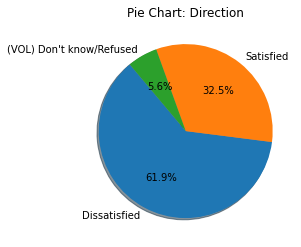

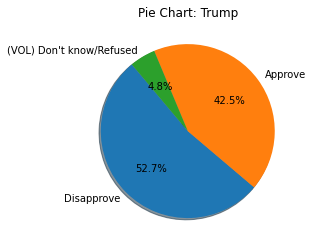

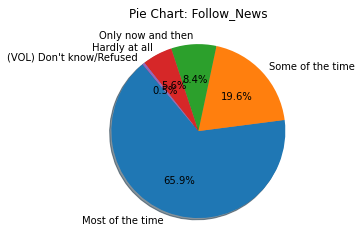

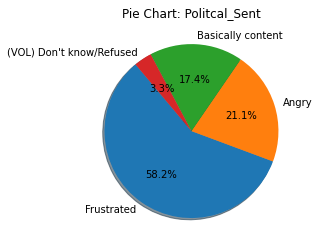

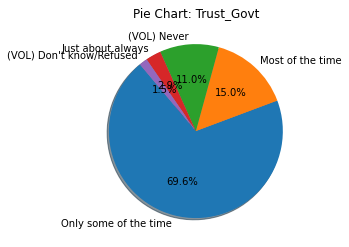

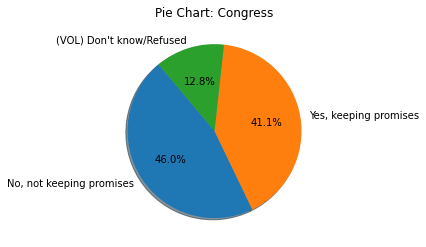

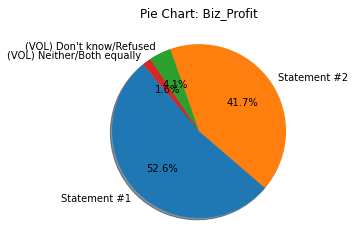

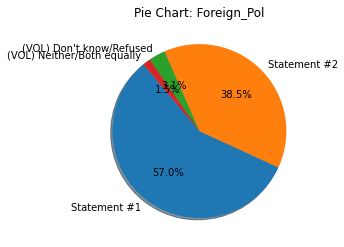

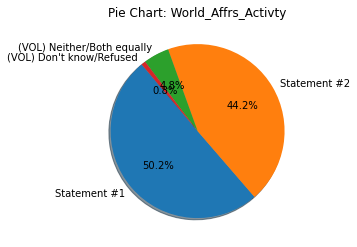

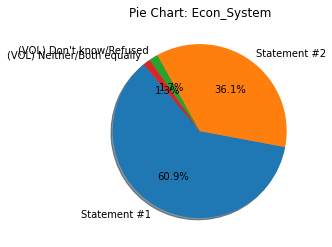

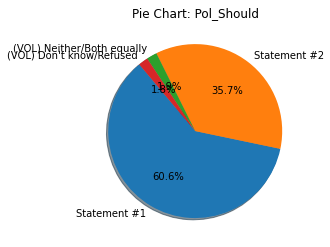

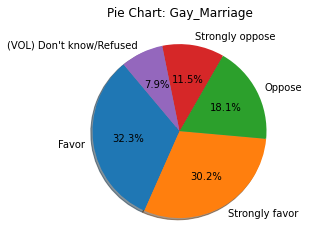

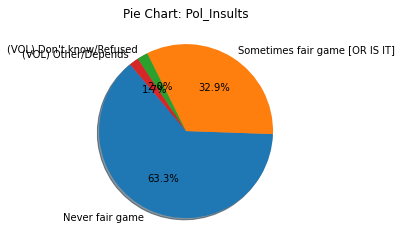

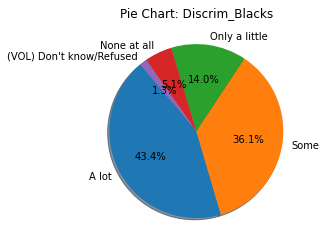

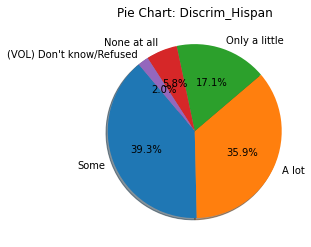

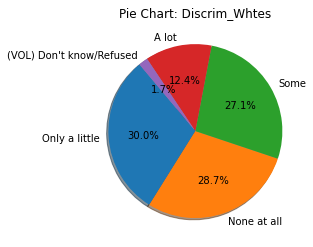

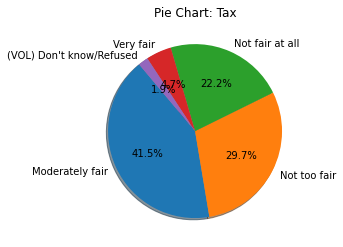

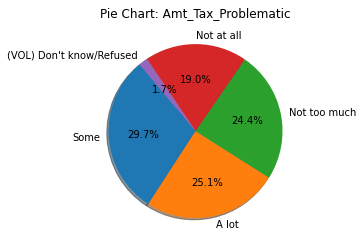

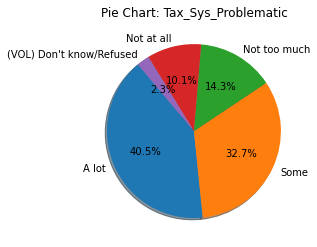

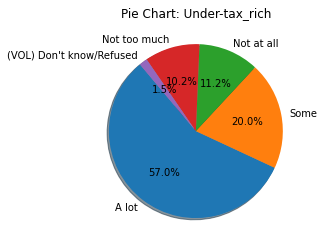

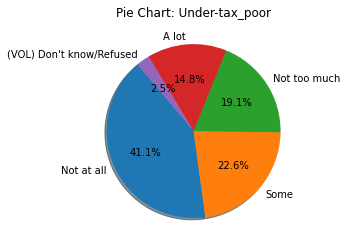

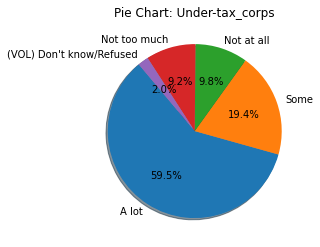

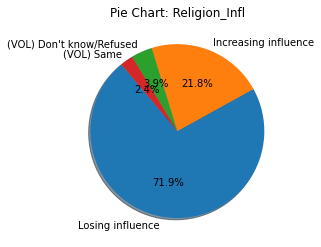

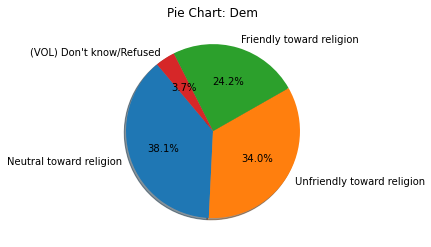

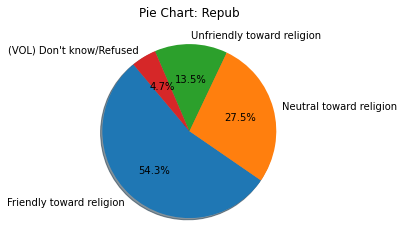

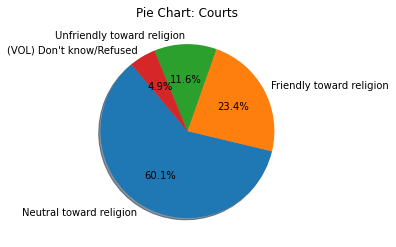

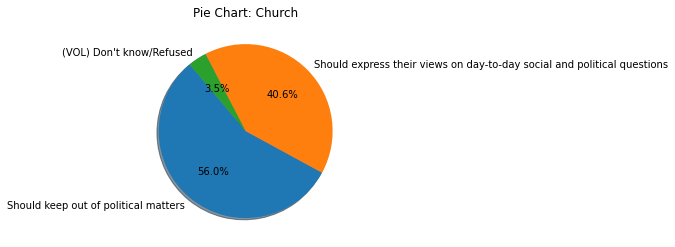

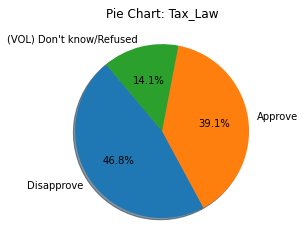

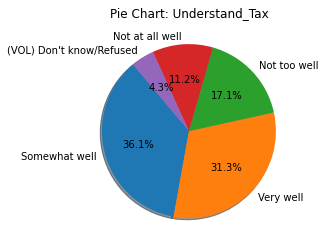

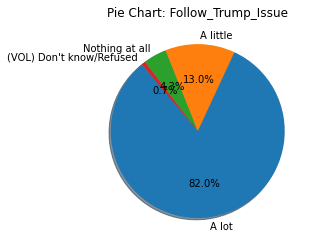

In [6]:
dt = pewwork.dtypes
catList = []
for i in dt.index:
    if dt[i] in (["category"]) : catList.append( i )
        
for i in catList :
    x = pewwork[ i ].value_counts(dropna=False)
    theLabels = x.axes[0].tolist()
    theSlices = list(x) #tells you the size of them
    plt.pie( theSlices, #this is the values to plot
        labels=theLabels, #labels will be the label of the categorical names
        startangle = 130,
        shadow=True,
        autopct="%1.1f%%") #displays percentage
    plt.title("Pie Chart: " + i)
    plt.show()

Since all of the variables that were taken in as a subset were categorical, it is easy to visually understand the variables through a pie chart. One of the observations that can be made are the questions regarding Business_Profit, Foreign_Policy, World_Affair_Activity and Economic_System seem to be variables that have similarities such as the choice of answers in which many picked statement_1. These variables are questions that are asked about common political problems that politicans are usually elected to solve. It would be interesting to see how they can be labeled with further analysis and identify any simiarities among the variables. Similarly, the variables Race_Discrim_Blacks, Race_Discrim_Hispanics, Race_Discrim_Whites all strike out to follow a "race" theme or label. The data does vary among Race_discrim_whites compared to the other two variables. There are also a decent amount of tax related questions that are fairly varied in terms of the answers. Lastly, religion seems to be an apparent label as well, but can be further analyzed. 

In [7]:
# build design matrix formula from variable name in item_complete
design_string = pewwork.columns

# fast way to create binary indicator variables for all items with complete
# data. this converts the 30 multi-category items into 100 binary indicator 
# variables.
pewdf = pd.get_dummies(pewwork, columns = design_string, drop_first = True)
pewdf.rename(columns = {'Biz_Profit_(VOL) Neither/Both equally': 'Biz_Profit_Neutral', 'Biz_Profit_Statement #1': 'Biz_Make_Too_Much',
       'Biz_Profit_Statement #2': 'Biz_Profit_Reasnble', 'Foreign_Pol_(VOL) Neither/Both equally': 'Neutral_on_ally_comproms',
       'Foreign_Pol_Statement #1': 'Comproms_w_allies', 'Foreign_Pol_Statement #2': 'No_comproms_w_allies',
       'World_Affrs_Activty_(VOL) Neither/Both equally': 'No_opinion_foreign_affrs',
       'World_Affrs_Activty_Statement #1': 'Pro_forgn_affrs', 'World_Affrs_Activty_Statement #2':'Focus_on_domest_affrs',
       'Econ_System_(VOL) Neither/Both equally': 'Neutral_spec_ints', 'Econ_System_Statement #1': 'Econ_favrs_int_Grps',
       'Econ_System_Statement #2': 'Econ_not_favr_int_grps', 'Pol_Should_(VOL) Neither/Both equally': 'Neutral_on_compromise',
       'Pol_Should_Statement #1': 'Pol_anticompromise', 'Pol_Should_Statement #2': 'Anti_compromise'}, inplace=True)
pewdf.head()

,Direction_Dissatisfied,Direction_Satisfied,Trump_Approve,Trump_Disapprove,Follow_News_Hardly at all,Follow_News_Most of the time,Follow_News_Only now and then,Follow_News_Some of the time,Politcal_Sent_Angry,Politcal_Sent_Basically content,...,Church_Should keep out of political matters,Tax_Law_Approve,Tax_Law_Disapprove,Understand_Tax_Not at all well,Understand_Tax_Not too well,Understand_Tax_Somewhat well,Understand_Tax_Very well,Follow_Trump_Issue_A little,Follow_Trump_Issue_A lot,Follow_Trump_Issue_Nothing at all
0,1,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In order to follow through with the various multivariate analysis, all of the categorical variables are transformed into indicator variables

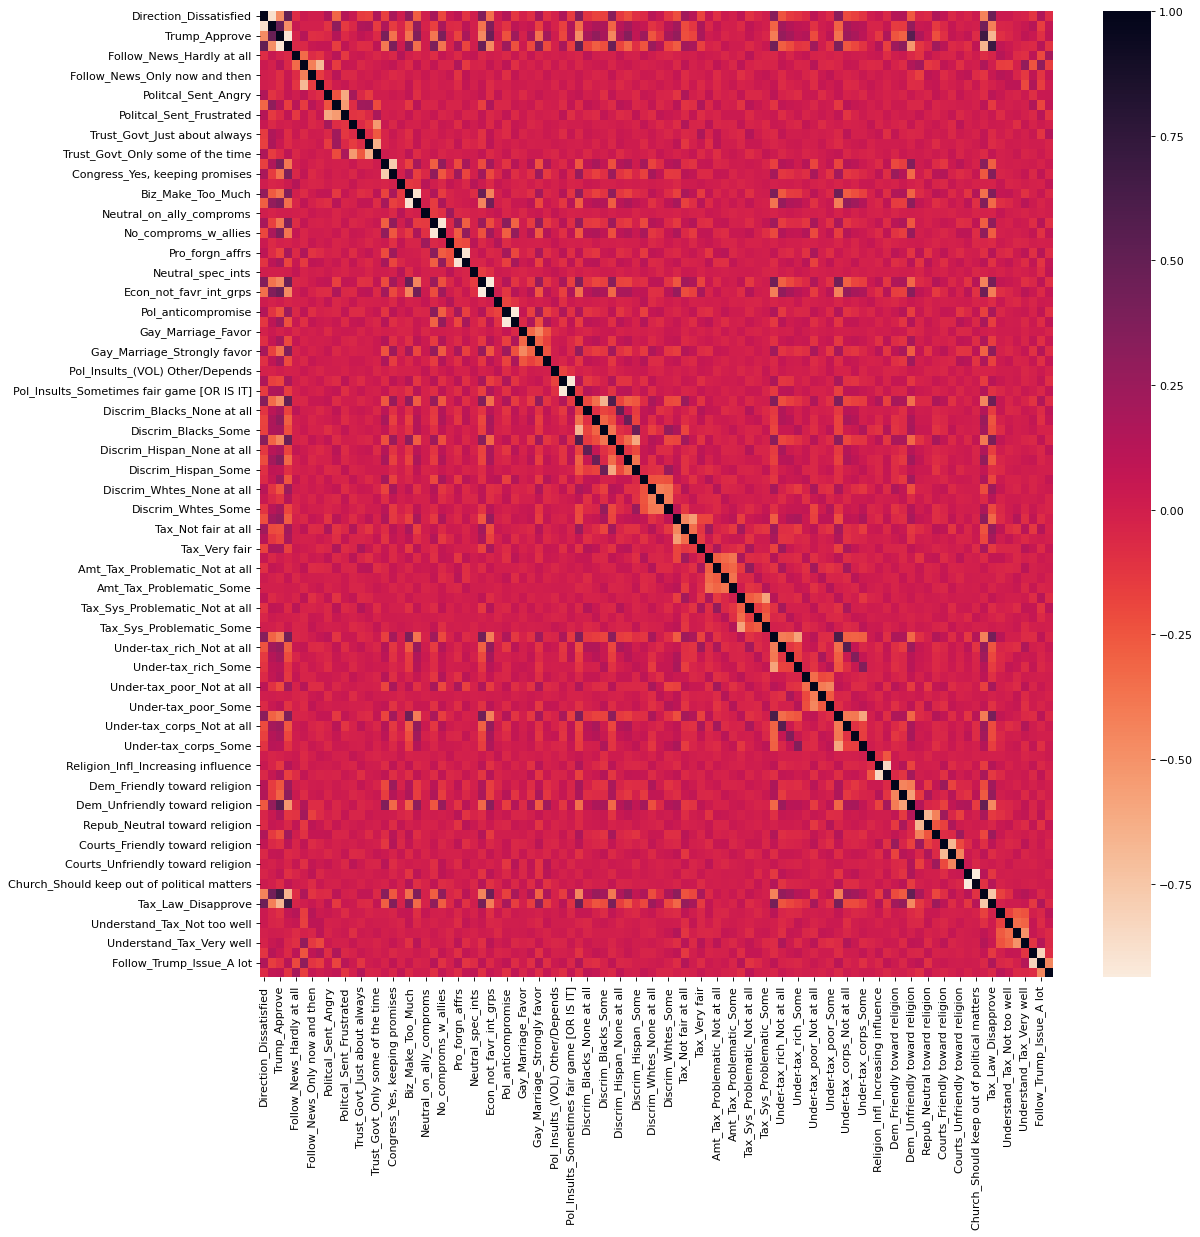

In [8]:
# getting correlation table
plt.figure(figsize=(16, 16), dpi=80)

correlation_table = pewdf.corr(method = 'pearson')
sns.heatmap(correlation_table, 
            cmap = sns.cm.rocket_r)
plt.show()

Hard to intepret/fuzzy resolution due to # of variables. However, you can see that there are some good correlations between variables - it's just a matter of finding them. It also tells us that not one or a few of them really stand out, so we need to dig deeper numerically to find the underlying structure of the data.

## Principal component analysis with no-NA opinion dataset

Note: usually we would standardize the data before applying PCA; since we are dealing with binary indicators, it is already standardized.

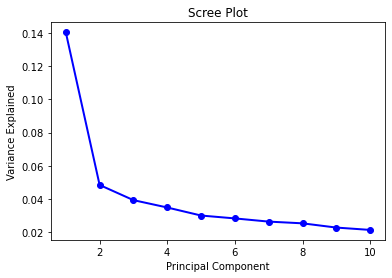

In [9]:
pca = PCA(n_components = 10)
pca_fit = pca.fit(pewdf)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Based on the scree plot, the number of principal components to choose from seems to be around 2. This is where the variation explained decreases to a steady slope from 2 principal components. 

In [10]:
print(pca.explained_variance_ratio_)

[0.14035536 0.04842239 0.03929574 0.0348652  0.03002942 0.02829594
 0.02637365 0.02533713 0.02278183 0.02137145]


We can see here that with 1 PC, 14% of the variance can be explained. Based on just 2 principal components, we are only explaining about 18% of the variation, which is fairly low. 

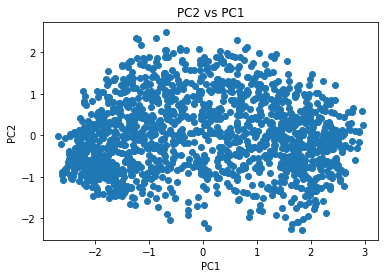

In [11]:
pca = PCA(n_components = 2)
pca_fit_transform = pca.fit_transform(pewdf)
pca_fit_transform

plt.scatter(pca_fit_transform[:,0], pca_fit_transform[:,1]);
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC2 vs PC1');

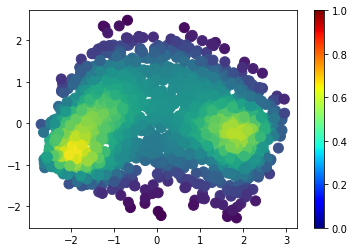

In [12]:
#density plot of PCA components
xy = np.vstack([pca_fit_transform[:,0],pca_fit_transform[:,1]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(pca_fit_transform[:,0], 
           pca_fit_transform[:,1], c=z, s=100)
sm = plt.cm.ScalarMappable(cmap = plt.cm.get_cmap('jet'), norm = matplotlib.colors.PowerNorm(vmin = -0.1, gamma = 1))
fig.colorbar(sm)
plt.show()

From just viewing the scatterplot of the 2 PCs, it is interesting to see that there is some sort of grouping that is occuring. With a density plot overlay of the principal components we can further investigate the grouping and see that there are two distinct groups of points in 2 different places. This shows that there is data that moves towards two different groups. 

## Factor Analysis with no-NA opinion dataset

It is best practice to statistically test data for a satisfactory amount of correlation before doing Factor Analysis.

In [13]:
# Perform Bartlett's Test of Sphericity to determine if there is correlation between variables
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(pewdf)
print(chi_square_value, p_value)

# Perform KMO test to find if the correlation matrix is suitable for Factor Analysis
# A result > 60 means the data is suitable for FA.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(pewdf)
print(kmo_model)


130153.66612506173 0.0
0.40183091193823384


/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


Test results:
- Bartlett's test was ok --> p-value sufficiently low (assuming 90% confidence)
- KMO test was NOT ok --> too low to use Factor Analysis

What does this mean?
We probably won't get very good results using Factor Analysis alone to explain the variance.

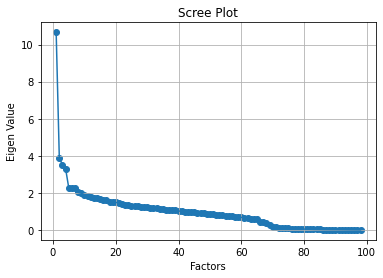

In [14]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=pewdf.shape[1])
fa.fit(pewdf)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,pewdf.shape[1]+1),ev)
plt.plot(range(1,pewdf.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

When using the factor analysis method, we do see that there is a dip for 5 components. This can be our first iteration of components to use

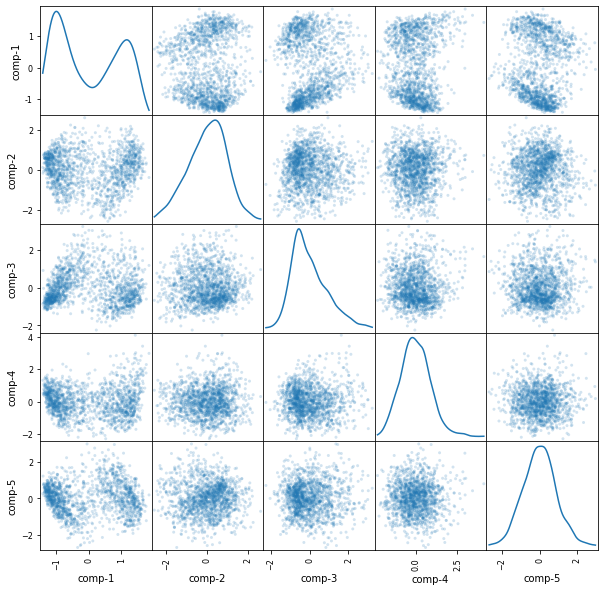

In [15]:
# factor analysis with data
from sklearn.decomposition import FactorAnalysis

# elbow looks to be at 5 components
FA_transformer = FactorAnalysis(n_components = 5, random_state = 0)
X_transformed = FA_transformer.fit_transform(pewdf)

FA_df = pd.DataFrame()
FA_df["comp-1"] = X_transformed[:,0]
FA_df["comp-2"] = X_transformed[:,1]
FA_df["comp-3"] = X_transformed[:,2]
FA_df["comp-4"] = X_transformed[:,3]
FA_df["comp-5"] = X_transformed[:,4]

from pandas.plotting import scatter_matrix
scatter_matrix(FA_df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

The scatterplots of each of the FA components are very useful in identifying components that are individualized or seperated based on some sort of relation to another component. For example, there seems to be grouping in comp-1 and comp-5 where two groups are starting to appear. It seems that comp-1 is a good contender with all the components when it comes to 2 distinct groups. This can be seen in row 1 as well as column 1. For the rest of the relationships, the data points are fairly random.  

In [16]:
from factor_analyzer import FactorAnalyzer
FA_transformer_df = FactorAnalyzer(5, rotation='varimax', method='principal')
FA_transformer_df.fit(pewdf)
loads_df = FA_transformer_df.loadings_
print(loads_df)

[[-0.62337645 -0.1036844   0.03828076 -0.18723674  0.21994695]
 [ 0.60923246  0.08866368 -0.03065279  0.1594701  -0.25585408]
 [ 0.70037813  0.42271893 -0.12412022 -0.12333962 -0.10880534]
 [-0.70525075 -0.42713872  0.13735146  0.06191026  0.0888873 ]
 [ 0.02972394  0.0852123   0.11320711  0.35393665  0.07053715]
 [ 0.15065902 -0.12167214  0.14425894 -0.68416769 -0.02177683]
 [-0.09018727  0.04468474 -0.09863156  0.3554464   0.2126956 ]
 [-0.13857662  0.06549187 -0.17644334  0.3509024  -0.16354653]
 [-0.14425264  0.17001469  0.22514454 -0.12237473  0.17418354]
 [ 0.31078501 -0.08000816  0.17544334  0.4289151  -0.14790767]
 [-0.14380832 -0.08662904 -0.33776598 -0.25036419 -0.05250005]
 [-0.06533757  0.22789532  0.17515194 -0.08326046  0.06799626]
 [ 0.19509003 -0.06160447  0.20916215  0.24926659 -0.05350839]
 [ 0.19902636 -0.17159288  0.04994843  0.1369251  -0.24201658]
 [-0.19061893  0.00216788 -0.25309071 -0.15334535  0.15462358]
 [ 0.27731597  0.48351867 -0.14689336 -0.10534965  0.00

In [17]:
print(sum(FA_transformer_df.get_factor_variance()[1]))
FA_transformer_df.get_factor_variance()

0.24165052024943134


(array([9.30990994, 4.7098261 , 3.8428374 , 3.44196691, 2.37721064]),
 array([0.09499908, 0.04805945, 0.03921263, 0.03512211, 0.02425725]),
 array([0.09499908, 0.14305853, 0.18227116, 0.21739327, 0.24165052]))

What is shown above?
- The first array in get_factor_variance explains the factor variances. 
- The second explains the proportional factor variance. 
- The third explains the cumulative factor variances. 

What does this mean?
- With 5 factors we explain a total of 20.7% of the data spread (or 24.17%, if using the principal parameter to fit the data).
- We can conclude that FA doesn't explain much of the data's variance. This is confirmed by the Bartlett and KMO test we ran earlier.

## Factor Analysis: Digging into the details

We made a heatmap to depict that the highest correlations resided mostly on the first feature, but were also randomly sprinkled in among the 2nd-5th factors. We'll again need to programmatically search for the features that have the highest correlation with each factor.

<AxesSubplot:>

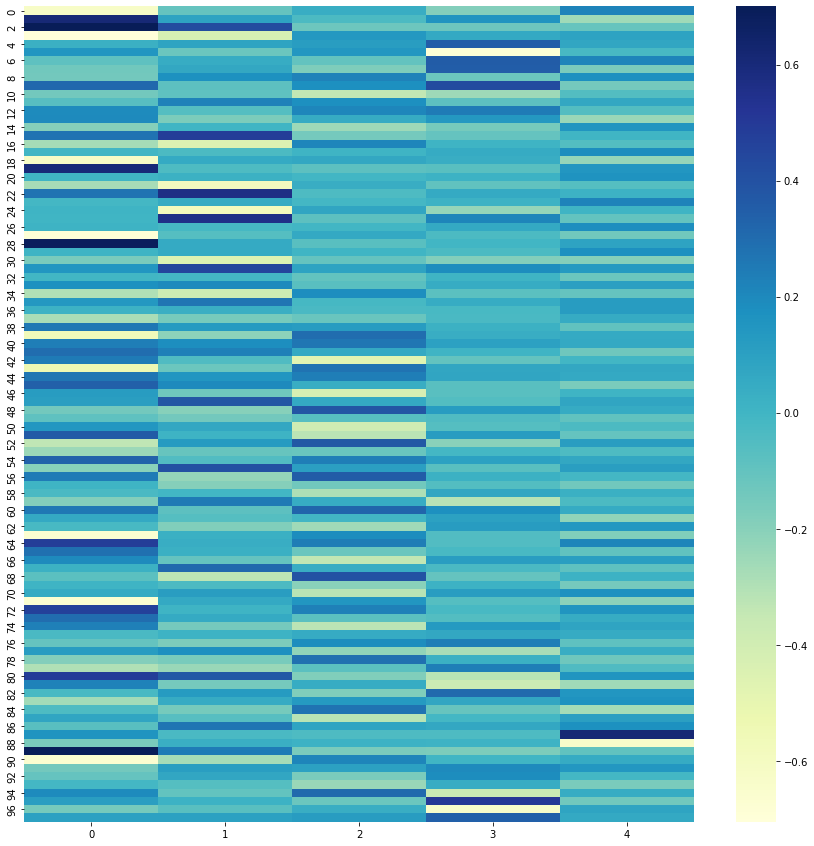

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(loads_df, cmap="YlGnBu")

The 5 Factors and Their Most Highly Correlated Loadings

In [19]:
# For each of the 5 factors, the 10 highest loadings (features) were selected in order to analyze commonalities
FA_loadings = pd.DataFrame(loads_df)
FA_loadings.index = pewdf.columns

factor_components = pd.DataFrame()

for i in range(5):
    factor = FA_loadings.iloc[:, i].nlargest(n=10).reset_index()
    factor_components = pd.concat([factor_components, factor], axis=1)

factor_components.columns = ['Factor 1 Features', 'Scores', 'Factor 2 Features', 'Scores', 'Factor 3 Features', 'Scores', 'Factor 4 Features', 'Scores', 'Factor 5 Features', 'Scores']
factor_components

,Factor 1 Features,Scores,Factor 2 Features,Scores,Factor 3 Features,Scores,Factor 4 Features,Scores,Factor 5 Features,Scores
0,Trump_Approve,0.700378,No_comproms_w_allies,0.568072,Under-tax_poor_Not at all,0.396934,Follow_Trump_Issue_A little,0.503475,Church_Should express their views on day-to-da...,0.615154
1,Tax_Law_Approve,0.698807,Focus_on_domest_affrs,0.561069,Discrim_Whtes_None at all,0.386589,Politcal_Sent_Basically content,0.428915,Direction_Dissatisfied,0.219947
2,Econ_not_favr_int_grps,0.685878,"Congress_No, not keeping promises",0.483519,Tax_Not fair at all,0.375270,Follow_News_Only now and then,0.355446,No_opinion_foreign_affrs,0.219046
3,Direction_Satisfied,0.609232,Anti_compromise,0.448802,Amt_Tax_Problematic_Not at all,0.358461,Follow_News_Hardly at all,0.353937,Under-tax_rich_Not at all,0.216050
4,Biz_Profit_Reasnble,0.601628,Trump_Approve,0.422719,Tax_Sys_Problematic_Not at all,0.323900,Follow_News_Some of the time,0.350902,Follow_News_Only now and then,0.212696
5,Under-tax_rich_Not at all,0.484912,Amt_Tax_Problematic_A lot,0.403572,Understand_Tax_Very well,0.307071,Follow_Trump_Issue_Nothing at all,0.342038,Biz_Profit_Neutral,0.188756
6,Dem_Unfriendly toward religion,0.481217,Discrim_Whtes_A lot,0.377036,Discrim_Blacks_A lot,0.297237,Repub_Neutral toward religion,0.310276,Neutral_spec_ints,0.179661
7,Under-tax_corps_Not at all,0.466958,Dem_Unfriendly toward religion,0.372191,Dem_Friendly toward religion,0.283224,Trust_Govt_Just about always,0.249267,Neutral_on_compromise,0.177809
8,Tax_Moderately fair,0.360687,Under-tax_poor_A lot,0.315947,Courts_Friendly toward religion,0.277072,Religion_Infl_Increasing influence,0.236902,Politcal_Sent_Angry,0.174184
9,Discrim_Hispan_Only a little,0.343097,Gay_Marriage_Strongly oppose,0.270510,Discrim_Hispan_A lot,0.275457,Dem_Neutral toward religion,0.235294,Courts_Unfriendly toward religion,0.171322


We made a dataframe to show the "overlying features" of the underlying 5 factors. 

## MDS with no-NA opinion dataset

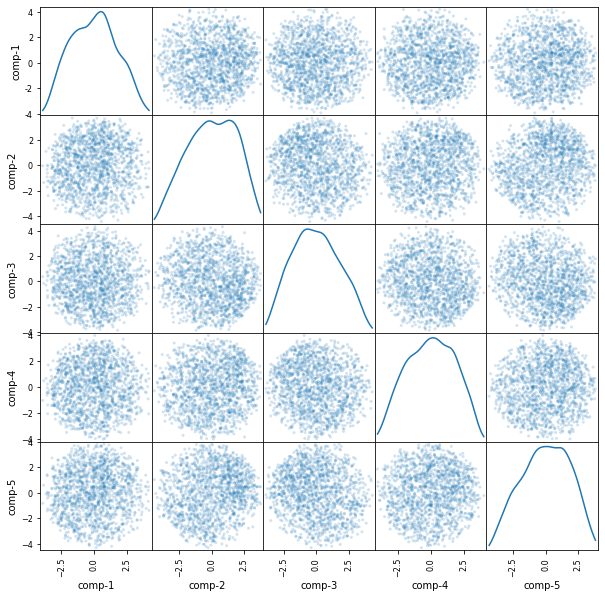

In [20]:
embedding = MDS(n_components = 5, random_state=0) ## find values
X_transformed = embedding.fit_transform(pewdf)

MDS_df = pd.DataFrame()
MDS_df["comp-1"] = X_transformed[:,0]
MDS_df["comp-2"] = X_transformed[:,1]
MDS_df["comp-3"] = X_transformed[:,2]
MDS_df["comp-4"] = X_transformed[:,3]
MDS_df["comp-5"] = X_transformed[:,4]

scatter_matrix(MDS_df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

Initially, we thought that because the data points are scattered or random on the scatter matrix above, perhaps MDS didn't do very well in terms of separating out our features into nice categories. However, we were pleasantly surprised to see that once we were able to map the features (in English) to the column names, there seemed to be clusters of features in two rough areas in our MDS chart below. 

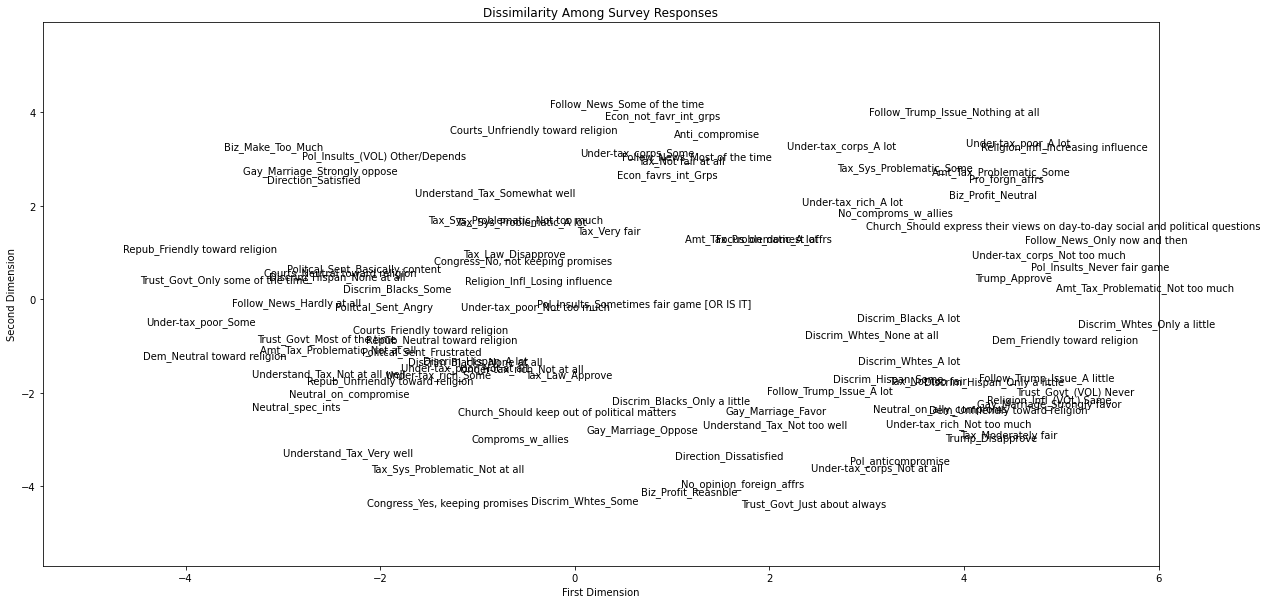

In [21]:
# Graph MDS to view results

# Compute distance matrix
distance_matrix = pairwise_distances(pewdf, metric = 'euclidean')

# Fit the MDS model to the distance matric & plot results
mds_model = MDS(n_components = 2, random_state = 12, dissimilarity = 'precomputed') # dissimilarity is precomputed because we already calculated the distance matrix
mds_fit = mds_model.fit(distance_matrix)
mds_coords = mds_model.fit_transform(distance_matrix)

# Plot data
plt.rcParams['figure.figsize'] = (20, 10)
plt.figure()
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], facecolors='none')
labels = pewdf.columns
for label, x, y in zip(labels, mds_coords[:, 0], mds_coords[:, 1]):
    plt.annotate(label, (x, y), xycoords='data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity Among Survey Responses')
plt.show()


MDS plots can be subjective in their interpretation. Nonetheless, our team sees a pretty clear divide between the right and left side of the plot (with an imaginary diagonal line running in between). We will discuss our findings more in the paper.